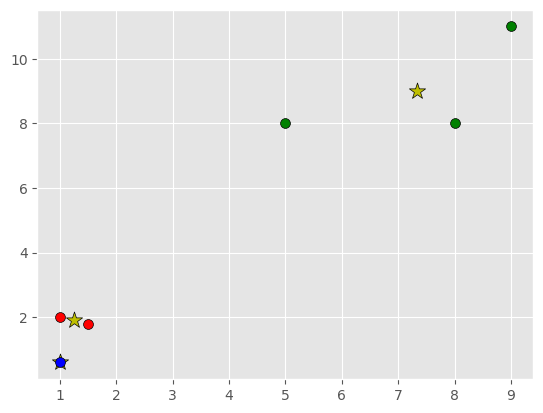

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('winequality_white.csv')

# Check if the dataset has a header row
if df.columns[0] == 0:
    # If the first column is 0, use the default column names
    df.columns = [f'col_{i}' for i in range(len(df.columns))]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the last column (target)

# Split the dataset into features and target
X = df_scaled
y = df.iloc[:, -1]  # Assuming the last column is the target variable

# Create and fit the K-means model
kmeans = KMeans(n_clusters=5, max_iter=400, verbose=False, tol=0.2)
predictions = kmeans.fit_predict(X)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='red', label='Centroids')
plt.title('Wine Quality Dataset - K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()